In [97]:
#install packages
!pip install pandas
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics packages
import pylab
import statsmodels.api as sm
import statistics as stat
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv ("C:/Users/blien/Documents/WGU/D208/Task_1/3kfid8emf9rkc9ek30sf/medical_clean.csv",dtype={'locationid':np.int64}) 
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
#renaming columns to better describe them
data.rename(columns = {'Item1':'Timely admission',
'Item2':'Timely treatment',
'Item3':'Timely visits',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Hours of treatment',
'Item7':'Courteous staff',
'Item8':'Active listening from Doctor'},
inplace=True)
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Timely admission,Timely treatment,Timely visits,Reliability,Options,Hours of treatment,Courteous staff,Active listening from Doctor
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
data_nulls = data.isnull().sum()
print(data_nulls)

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
ReAdmis                         0
VitD_levels                     0
Doc_visits                      0
Full_meals_eaten                0
vitD_supp                       0
Soft_drink                      0
Initial_admin                   0
HighBlood                       0
Stroke                          0
Complication_risk               0
Overweight    

In [5]:
# Remove less meaningful variables from dataset
med_df = data.drop(columns=['CaseOrder', 'Customer_id', 'Interaction','UID', 'City','State', 'County', 'Zip', 'Lat', 'Lng','Population','Area', 'TimeZone', 'Job', 'Marital', 'Timely admission','Timely treatment','Timely visits','Reliability','Options','Hours of treatment','Courteous staff','Active listening from Doctor'])
med_df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587
std,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000


In [6]:
med_df.dtypes

Children                int64
Age                     int64
Income                float64
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
dtype: object

In [7]:
# variable for numeric data
num_cols = med_df.select_dtypes(include="number").columns
print(num_cols)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')


In [8]:
# variable for categorical data
cat_cols = med_df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


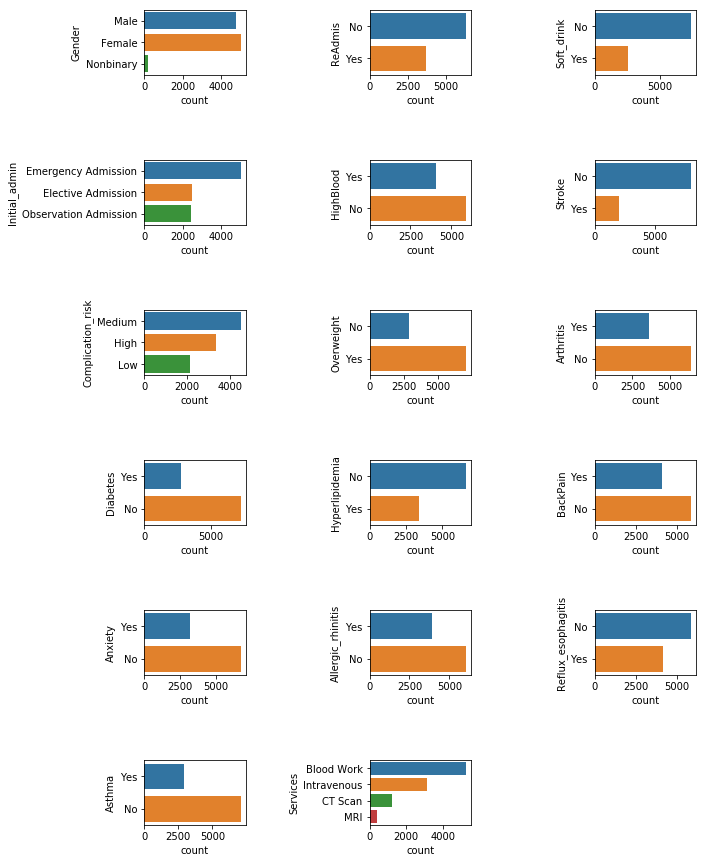

In [9]:
# plot categorical data - before it gets converted
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=med_df)
    fig.tight_layout(h_pad=4, w_pad=4)

plt.show()

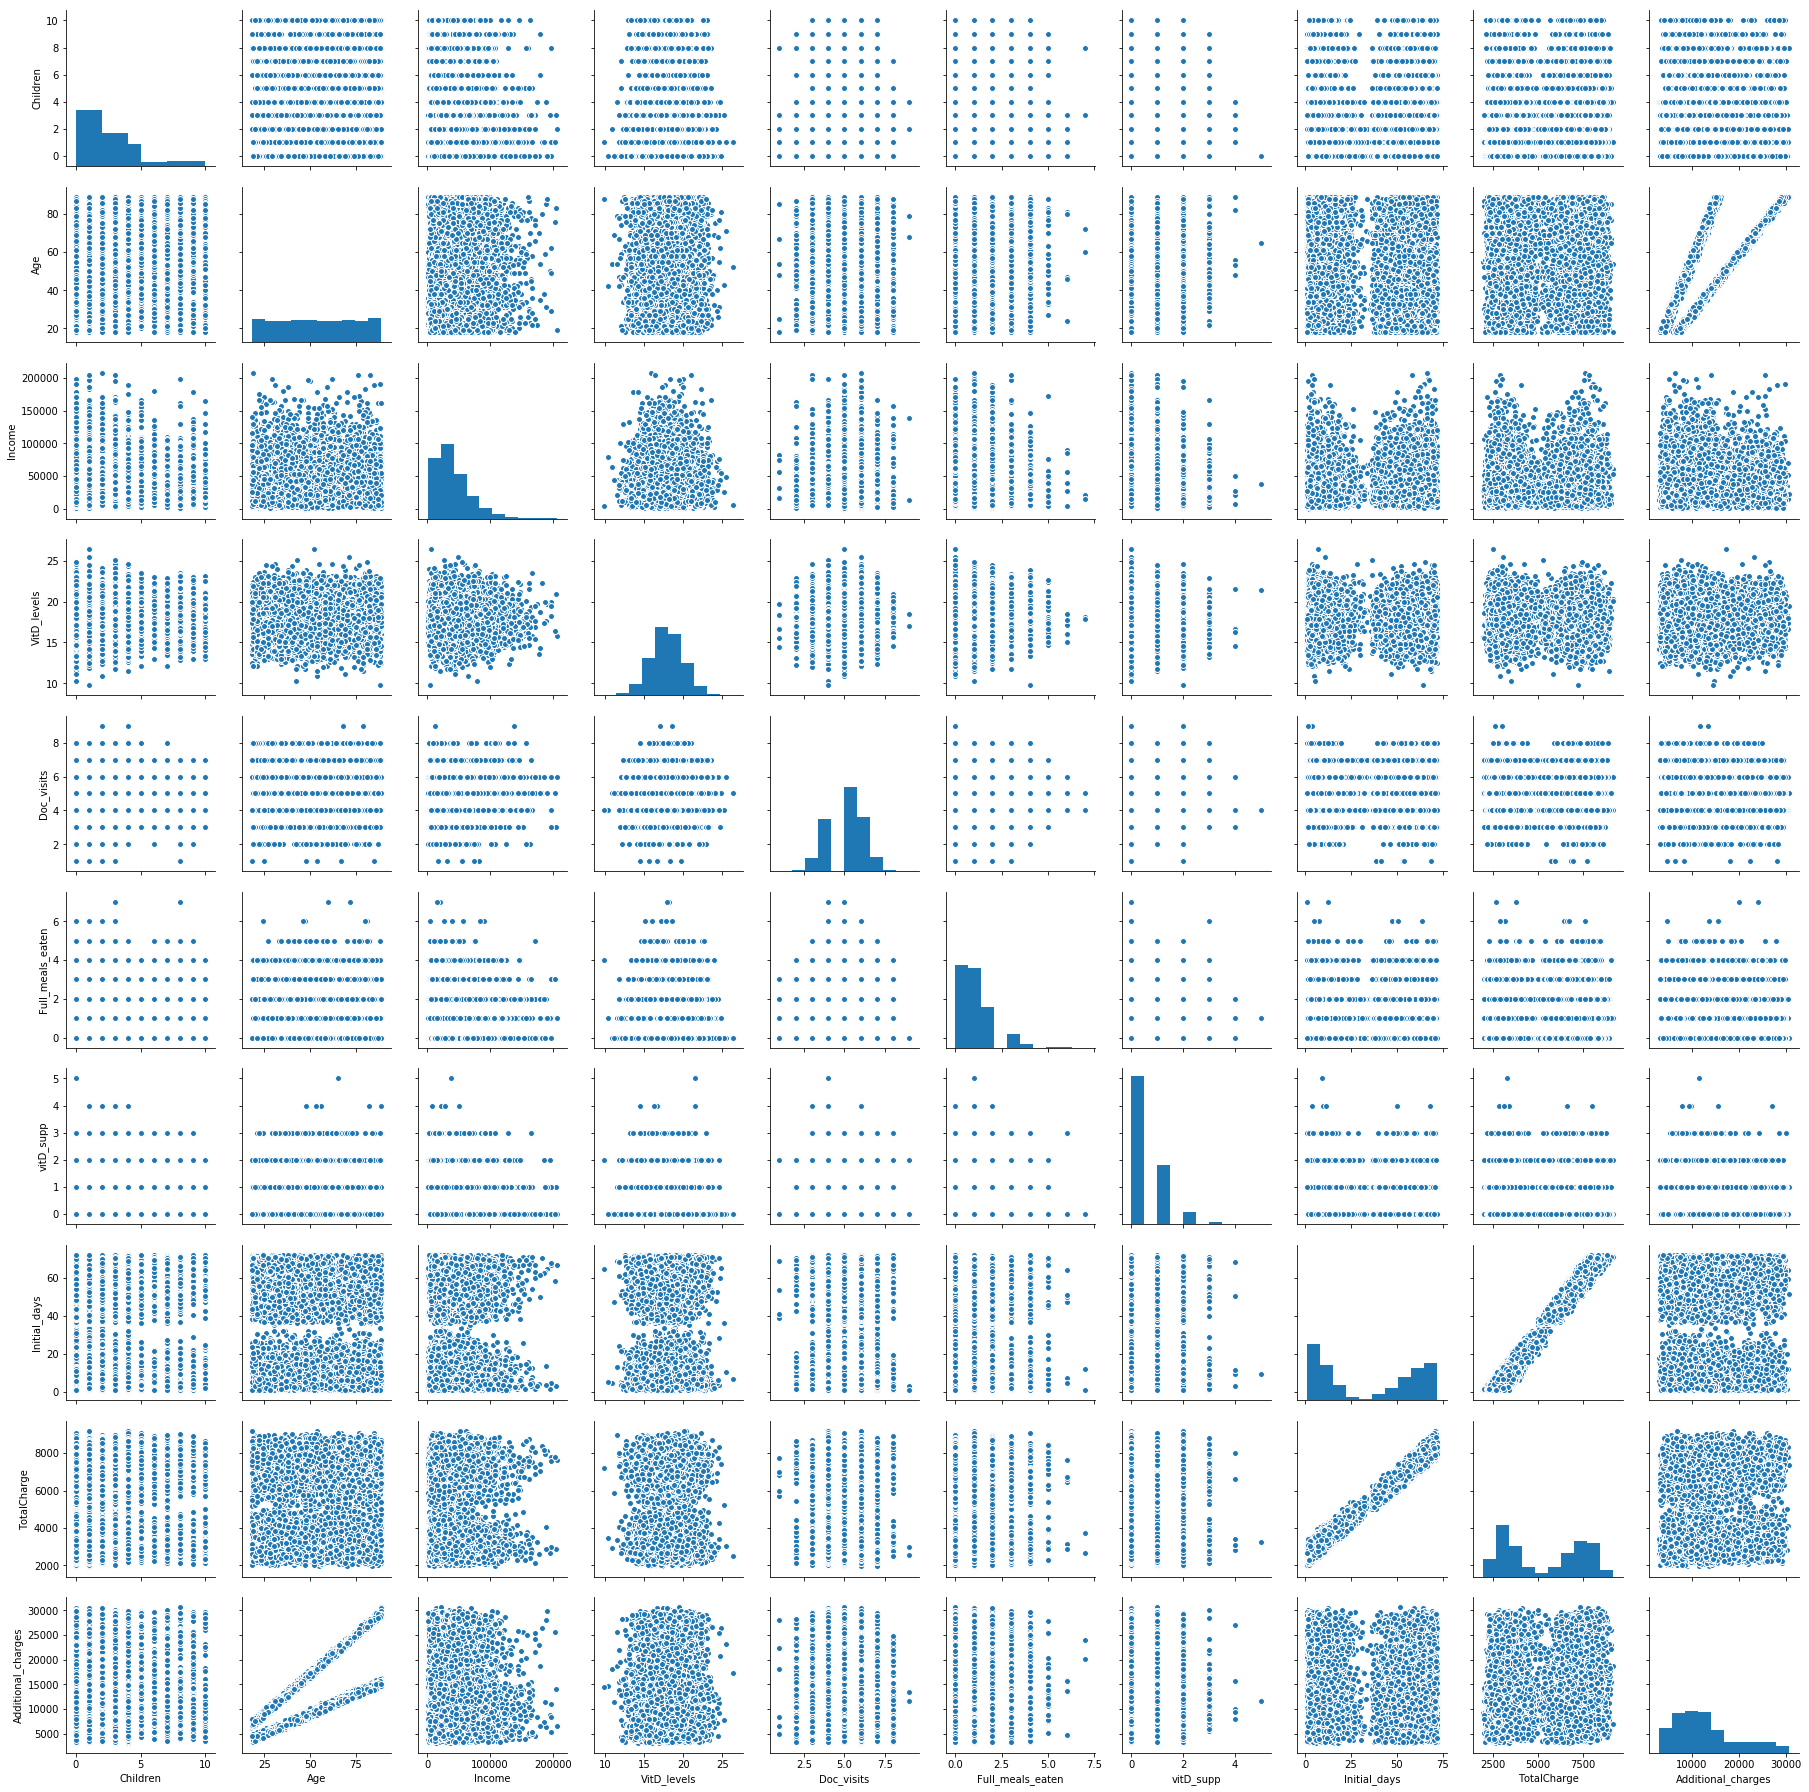

In [10]:
# create data visualizations
ax = sns.pairplot(med_df[num_cols])
plt.show()

<Figure size 720x1440 with 0 Axes>

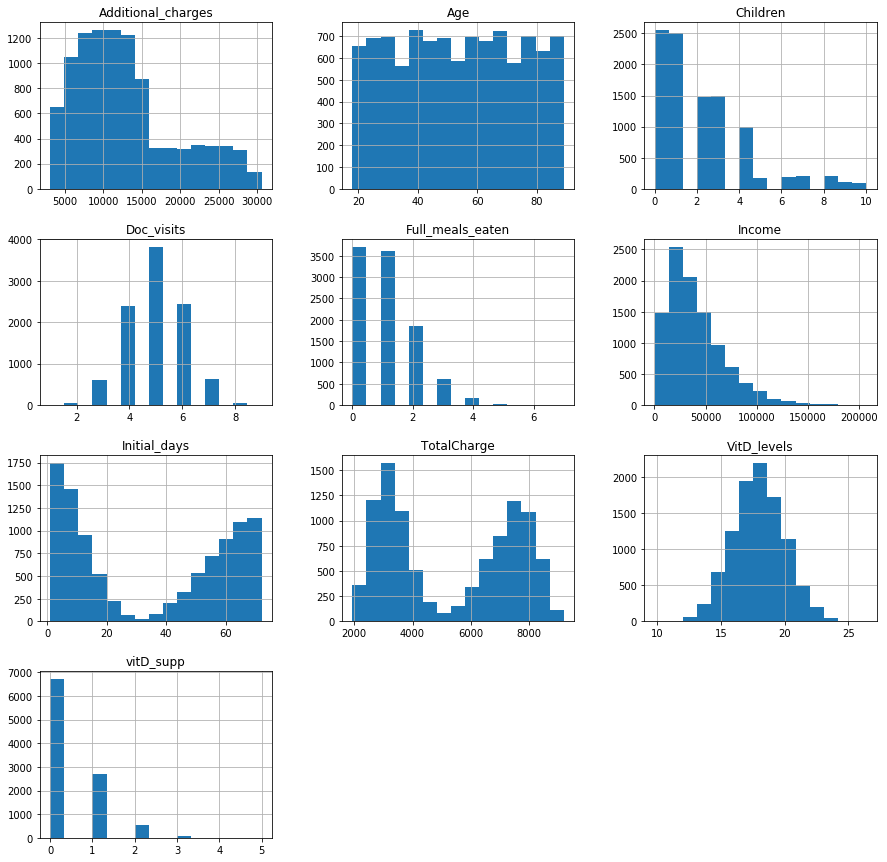

In [11]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = med_df[num_cols].hist(bins = 15, figsize=(15,15))
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

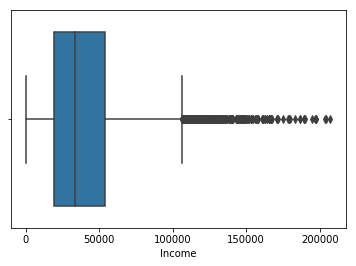

In [12]:
sns.boxplot('Income', data = med_df)
plt.show()

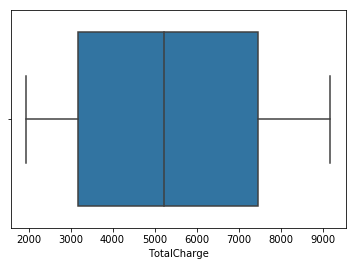

In [13]:
sns.boxplot('TotalCharge', data = med_df)
plt.show()

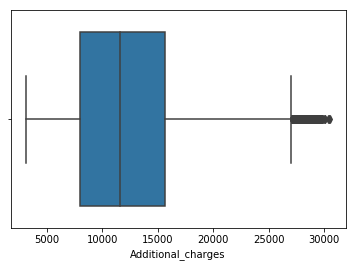

In [14]:
sns.boxplot('Additional_charges', data = med_df)
plt.show()

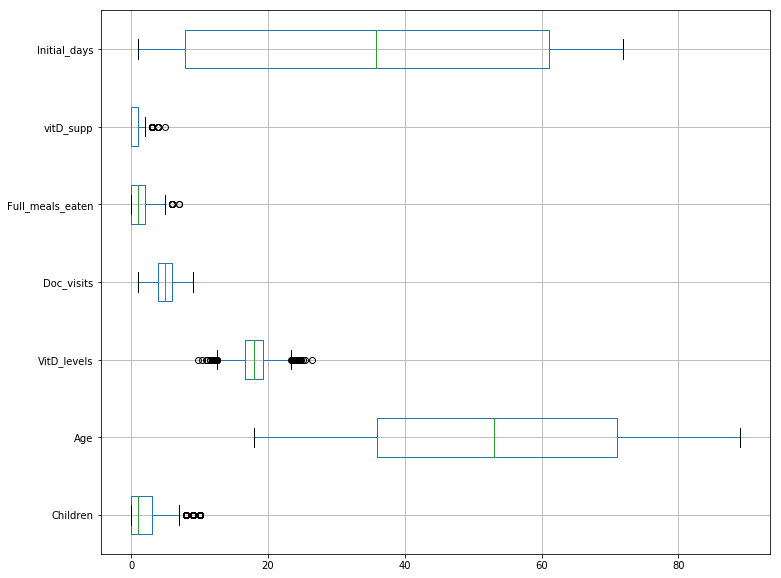

                      count       mean        std       min        25%  \
Children            10000.0      2.097      2.164     0.000      0.000   
Age                 10000.0     53.512     20.639    18.000     36.000   
Income              10000.0  40490.495  28521.153   154.080  19598.775   
VitD_levels         10000.0     17.964      2.017     9.806     16.626   
Doc_visits          10000.0      5.012      1.046     1.000      4.000   
Full_meals_eaten    10000.0      1.001      1.008     0.000      0.000   
vitD_supp           10000.0      0.399      0.629     0.000      0.000   
Initial_days        10000.0     34.455     26.309     1.002      7.896   
TotalCharge         10000.0   5312.173   2180.394  1938.312   3179.374   
Additional_charges  10000.0  12934.529   6542.602  3125.703   7986.488   

                          50%        75%         max  
Children                1.000      3.000      10.000  
Age                    53.000     71.000      89.000  
Income              

In [15]:
# explore numeric predictor data
X = med_df[['Children', 'Age', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days']]
plt.figure(figsize=(12, 10))
std_numeric_data = (X)
ax = std_numeric_data.boxplot(vert=False)
plt.show()
#print(std_numeric_data.describe(percentiles=None).round(3).T)
print(med_df[num_cols].describe(percentiles=None).round(3).T)

In [16]:
med_df["Complication_risk"].value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [17]:
med_df["complication_risk"] = med_df["Complication_risk"].astype('category')
med_df.dtypes

Children                 int64
Age                      int64
Income                 float64
Gender                  object
ReAdmis                 object
VitD_levels            float64
Doc_visits               int64
Full_meals_eaten         int64
vitD_supp                int64
Soft_drink              object
Initial_admin           object
HighBlood               object
Stroke                  object
Complication_risk       object
Overweight              object
Arthritis               object
Diabetes                object
Hyperlipidemia          object
BackPain                object
Anxiety                 object
Allergic_rhinitis       object
Reflux_esophagitis      object
Asthma                  object
Services                object
Initial_days           float64
TotalCharge            float64
Additional_charges     float64
complication_risk     category
dtype: object

In [18]:
#encode categorical variables
med_df["complication_risk_cat"] = med_df["complication_risk"].cat.codes
med_df.head()

,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,...,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,complication_risk,complication_risk_cat
0,1,53,86575.93,Male,No,19.141466,6,0,0,No,...,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,Medium,2
1,3,51,46805.99,Female,No,18.940352,4,2,1,No,...,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,High,0
2,3,53,14370.14,Female,No,18.057507,4,1,0,No,...,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,Medium,2
3,0,78,39741.49,Male,No,16.576858,4,1,0,No,...,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,Medium,2
4,1,22,1209.56,Female,No,17.439069,5,0,2,Yes,...,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,Low,1


In [19]:
#create dummy variables
med_df['DummyGenderFemale'] = [1 if v == 'Female' else 0 for v in med_df['Gender']]
med_df['DummyReAdmisYes'] = [1 if v == 'Yes' else 0 for v in med_df['ReAdmis']]
med_df['DummySoftDYes'] = [1 if v == 'Yes' else 0 for v in med_df['Soft_drink']]
med_df['DummyEmergencyAdmission'] = [1 if v == 'Emergency Admission' else 0 for v in med_df['Initial_admin']]
med_df['DummyHighBloodYes'] = [1 if v == 'Yes' else 0 for v in med_df['HighBlood']]
med_df['DummyStrokeYes'] = [1 if v == 'Yes' else 0 for v in med_df['Stroke']]
med_df['DummyOverweightYes'] = [1 if v == 'Yes' else 0 for v in med_df['Overweight']]
med_df['DummyArthritisYes'] = [1 if v == 'Yes' else 0 for v in med_df['Arthritis']]
med_df['DummyDiabetesYes'] = [1 if v == 'Yes' else 0 for v in med_df['Diabetes']]
med_df['DummyHyperlipidemiaYes'] = [1 if v == 'Yes' else 0 for v in med_df['Hyperlipidemia']]
med_df['DummyBackPainYes'] = [1 if v == 'Yes' else 0 for v in med_df['BackPain']]
med_df['DummyAnxietyYes'] = [1 if v == 'Yes' else 0 for v in med_df['Anxiety']]
med_df['DummyAllergic_rhinitisYes'] = [1 if v == 'Yes' else 0 for v in med_df['Allergic_rhinitis']]
med_df['DummyRefluxYes'] = [1 if v == 'Yes' else 0 for v in med_df['Reflux_esophagitis']]
med_df['DummyAsthmaYes'] = [1 if v == 'Yes' else 0 for v in med_df['Asthma']]
med_df['DummyServicesBloodWork'] = [1 if v == 'Blood Work' else 0 for v in med_df['Services']]

In [20]:
# Drop original categorical features from dataframe
med_df = med_df.drop(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin','HighBlood', 'Stroke','Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia','BackPain', 'Anxiety','Allergic_rhinitis','Reflux_esophagitis', 'Asthma','Services', 'Complication_risk', 'complication_risk'], axis = 1)
med_df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,DummyOverweightYes,DummyArthritisYes,DummyDiabetesYes,DummyHyperlipidemiaYes,DummyBackPainYes,DummyAnxietyYes,DummyAllergic_rhinitisYes,DummyRefluxYes,DummyAsthmaYes,DummyServicesBloodWork
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,...,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,0.526500
std,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,...,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.499322
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [21]:
df = med_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'complication_risk_cat', 'DummyGenderFemale',
       'DummyReAdmisYes', 'DummySoftDYes', 'DummyEmergencyAdmission',
       'DummyHighBloodYes', 'DummyStrokeYes', 'DummyOverweightYes',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes', 'DummyAsthmaYes', 'DummyServicesBloodWork'],
      dtype='object')


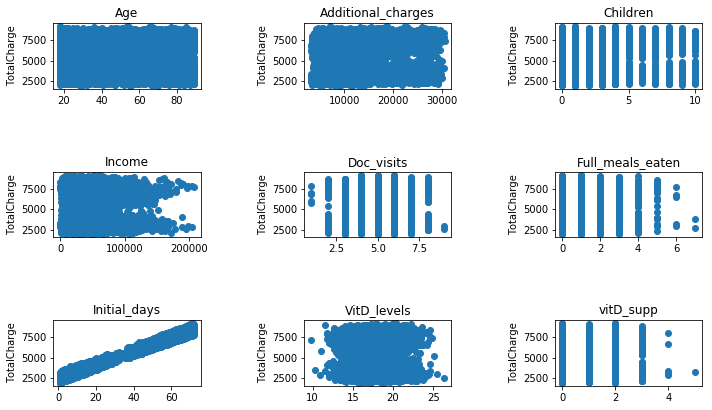

In [22]:
# scatter plot of selected features
fig = plt.figure(figsize=(10, 20))
features = ['Age','Additional_charges','Children','Income',
            'Doc_visits','Full_meals_eaten','Initial_days',
            'VitD_levels','vitD_supp']
target = med_df['TotalCharge']

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = med_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('TotalCharge')
    fig.tight_layout(h_pad=5, w_pad=5)

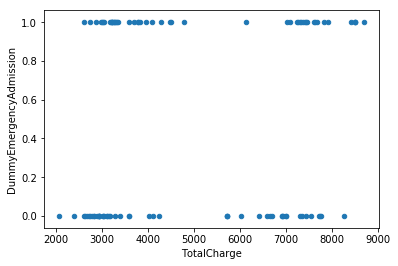

In [23]:
# Create a scatter plot of Total Charge and dummyanxiety
med_df[med_df['TotalCharge'] < 100000].sample(100).plot.scatter(x='TotalCharge', y='DummyEmergencyAdmission')

In [24]:
# Extract Clean dataset
med_df.to_csv('med_prepared.csv')

In [25]:
# initial model using continuous variables and dummy variables
med_df['intercept'] = 1
Model_totalcharge = sm.OLS(med_df['TotalCharge'], med_df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days',
       'Additional_charges', 'complication_risk_cat', 'DummyGenderFemale',
       'DummyReAdmisYes', 'DummySoftDYes', 'DummyEmergencyAdmission',
       'DummyHighBloodYes', 'DummyStrokeYes', 'DummyOverweightYes',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes', 'DummyAsthmaYes', 'DummyServicesBloodWork','intercept']]).fit()
print(Model_totalcharge.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.581e+05
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:14:45   Log-Likelihood:                -58496.
No. Observations:               10000   AIC:                         1.170e+05
Df Residuals:                    9973   BIC:                         1.172e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Children              

In [26]:
# equation of the regression line
print('Adj. R-squared: {}'.format(Model_totalcharge.summary2().tables[0][3][0]))
equation = Model_totalcharge.summary2().tables[1]
print('Estimate [{}] as y = '.format(Model_totalcharge.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.999
Estimate [TotalCharge] as y = 
   -0.05 x ( Children ) 
   -0.93 x ( Age ) 
   -0.00 x ( Income ) 
   +0.39 x ( VitD_levels ) 
   +0.60 x ( Doc_visits ) 
   +0.92 x ( Full_meals_eaten ) 
   +0.19 x ( vitD_supp ) 
   +81.75 x ( Initial_days ) 
   +0.00 x ( Additional_charges ) 
   -199.49 x ( complication_risk_cat ) 
   -0.42 x ( DummyGenderFemale ) 
   +8.59 x ( DummyReAdmisYes ) 
   +0.92 x ( DummySoftDYes ) 
   +508.39 x ( DummyEmergencyAdmission ) 
   +81.54 x ( DummyHighBloodYes ) 
   -1.23 x ( DummyStrokeYes ) 
   +1.32 x ( DummyOverweightYes ) 
   +71.47 x ( DummyArthritisYes ) 
   +73.66 x ( DummyDiabetesYes ) 
   +94.93 x ( DummyHyperlipidemiaYes ) 
   +81.99 x ( DummyBackPainYes ) 
   +86.48 x ( DummyAnxietyYes ) 
   +58.52 x ( DummyAllergic_rhinitisYes ) 
   +59.73 x ( DummyRefluxYes ) 
   -1.05 x ( DummyAsthmaYes ) 
   -0.89 x ( DummyServicesBloodWork ) 
   +2223.70 x ( intercept ) 


In [29]:
#model with reduced p value variables
med_df['intercept'] = 1
Model_totalcharge = sm.OLS(med_df['TotalCharge'], med_df[['Age', 'Initial_days',
       'Additional_charges', 'complication_risk_cat',
       'DummyReAdmisYes', 'DummyEmergencyAdmission',
       'DummyHighBloodYes',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes','intercept']]).fit()
print(Model_totalcharge.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.797e+05
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:16:31   Log-Likelihood:                -58498.
No. Observations:               10000   AIC:                         1.170e+05
Df Residuals:                    9985   BIC:                         1.171e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Age                   

In [30]:
# the independent variables set
B = med_df[['Age', 'Initial_days',
       'Additional_charges', 'complication_risk_cat',
       'DummyReAdmisYes', 'DummyEmergencyAdmission',
       'DummyHighBloodYes',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = B.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(B.values, i)
                          for i in range(len(B.columns))]
  
print(vif_data)

                      feature        VIF
0                         Age  49.836267
1                Initial_days   9.112258
2          Additional_charges  67.781617
3       complication_risk_cat   2.465906
4             DummyReAdmisYes   5.605184
5     DummyEmergencyAdmission   1.899385
6           DummyHighBloodYes  10.885243
7           DummyArthritisYes   1.529877
8            DummyDiabetesYes   1.349168
9      DummyHyperlipidemiaYes   1.471974
10           DummyBackPainYes   1.654973
11            DummyAnxietyYes   1.445013
12  DummyAllergic_rhinitisYes   1.604013
13             DummyRefluxYes   1.640275


In [31]:
med_df['intercept'] = 1
Model_totalcharge = sm.OLS(med_df['TotalCharge'], med_df[['Initial_days', 'DummyEmergencyAdmission',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes','intercept']]).fit()
print(Model_totalcharge.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:17:17   Log-Likelihood:                -67338.
No. Observations:               10000   AIC:                         1.347e+05
Df Residuals:                    9990   BIC:                         1.348e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Initial_days          

In [127]:
X = med_df[['Initial_days', 'DummyEmergencyAdmission',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes',]]

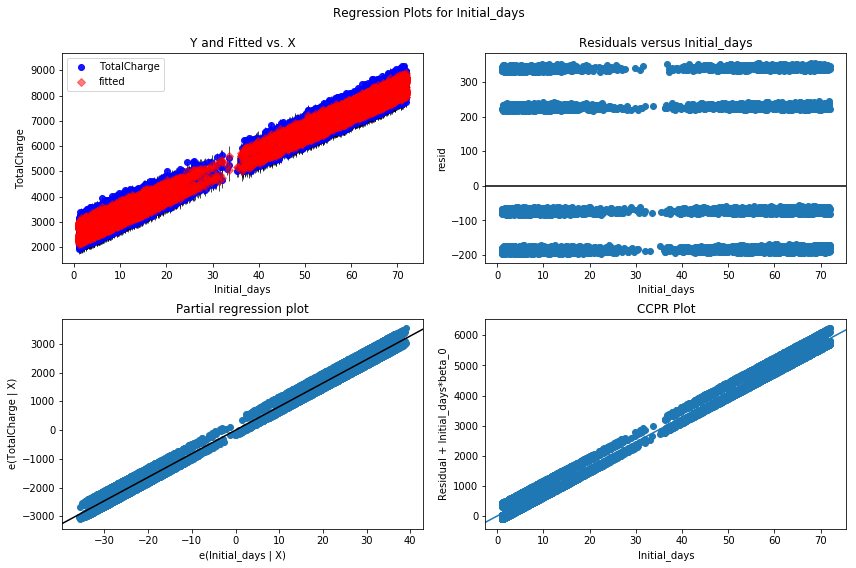

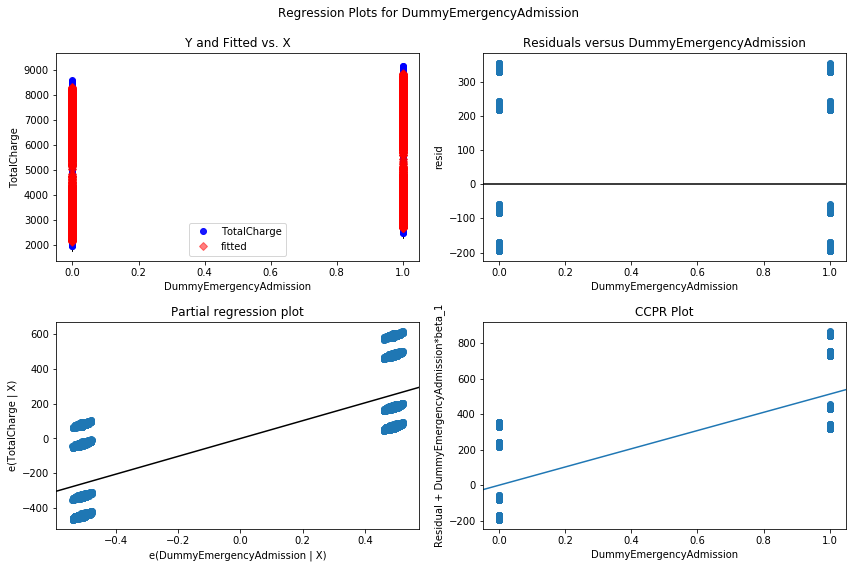

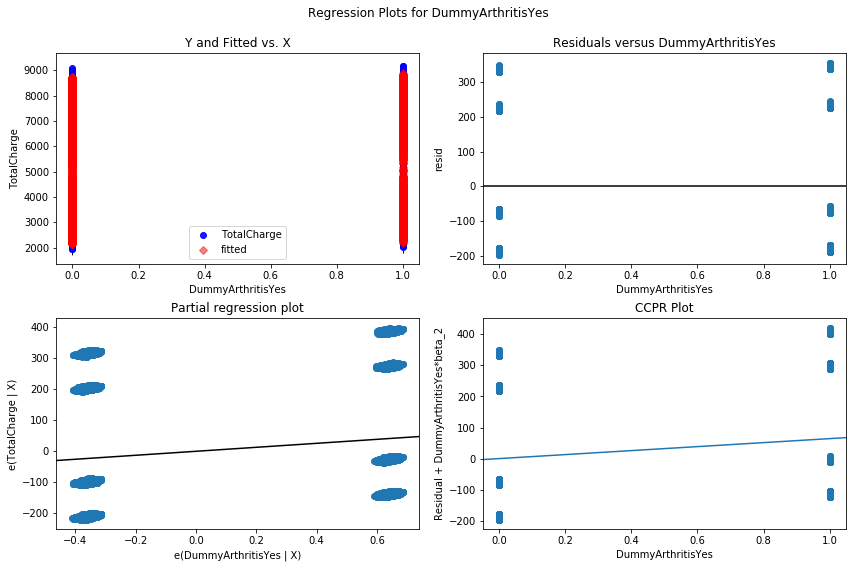

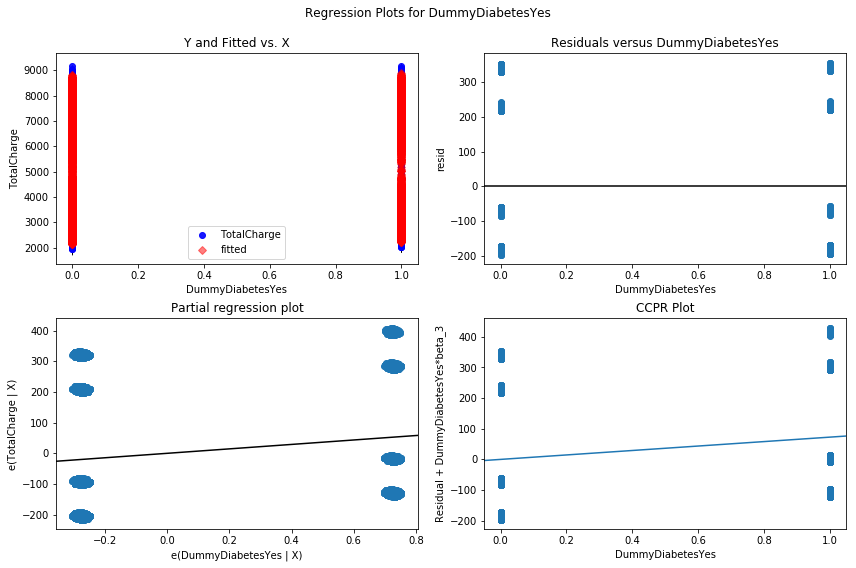

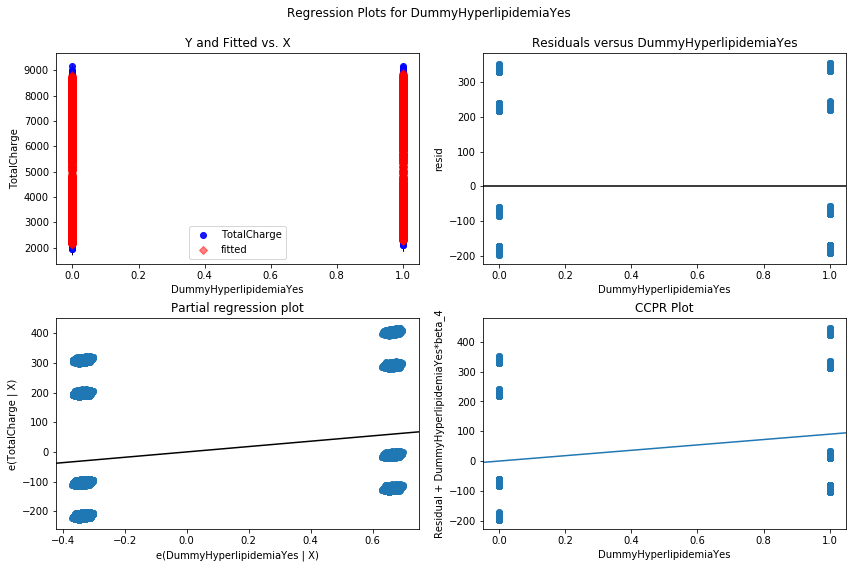

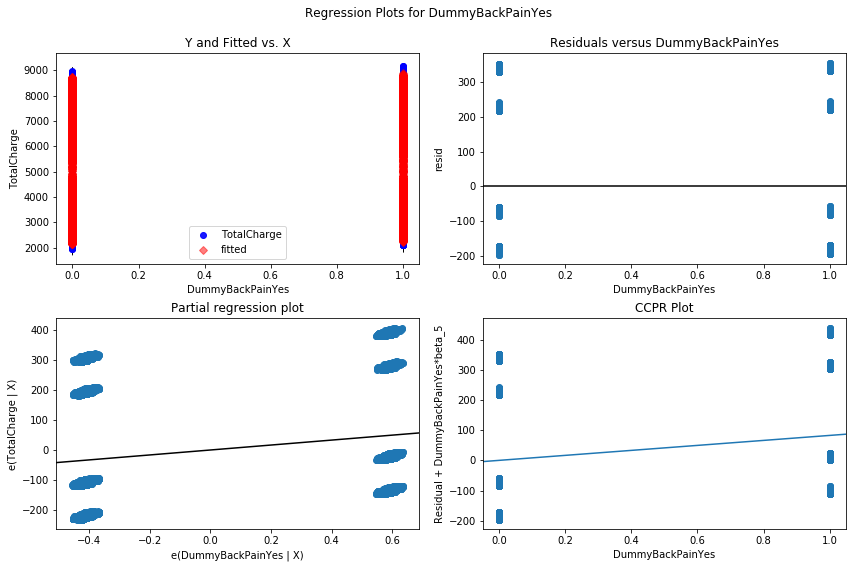

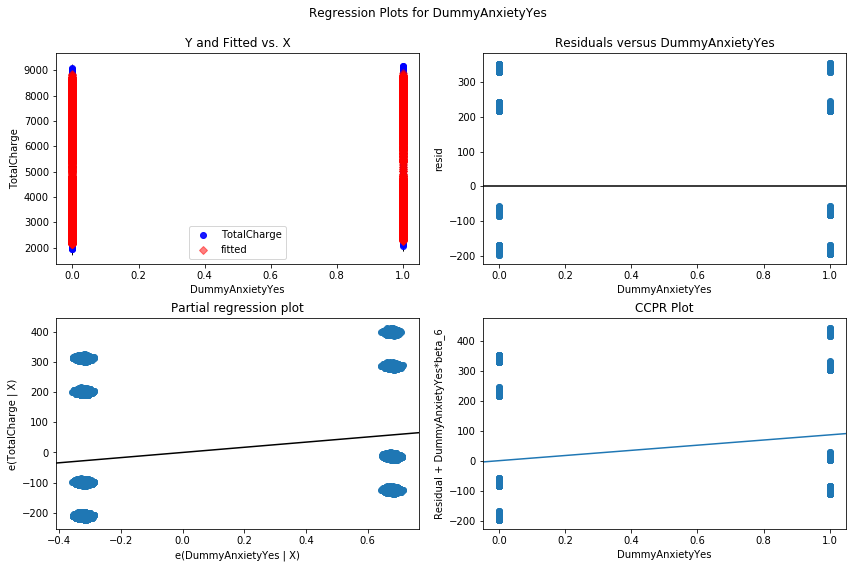

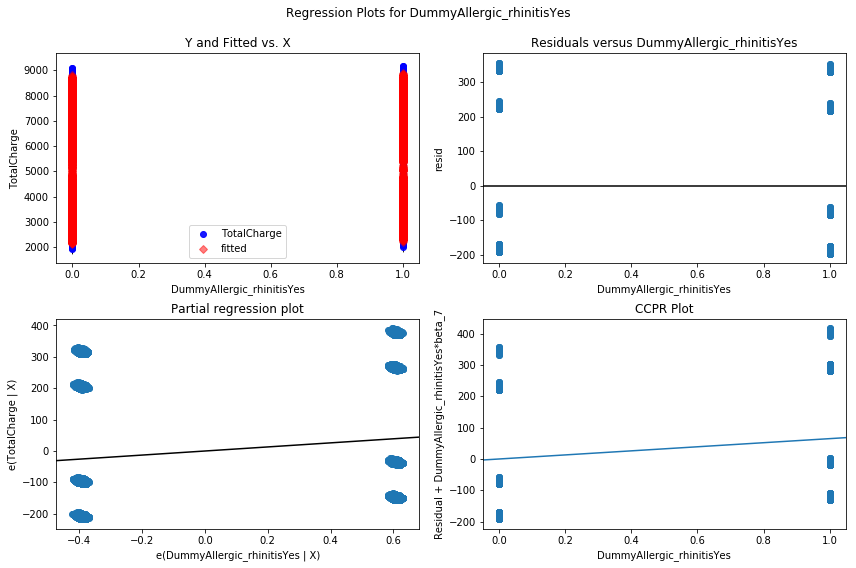

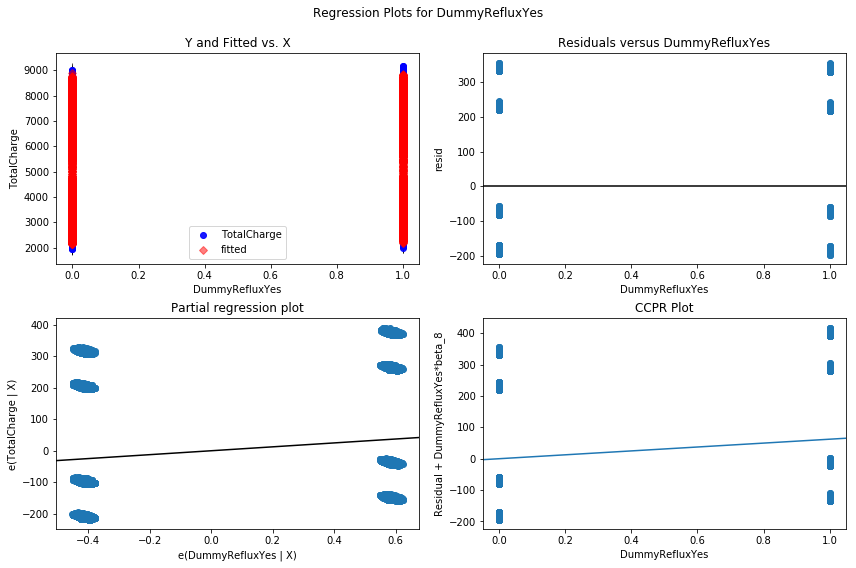

In [128]:
#create residual plot for all of the model's final predictor variable 
for c in X.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(Model_totalcharge, c, fig=fig)
    plt.savefig('residuals.png')

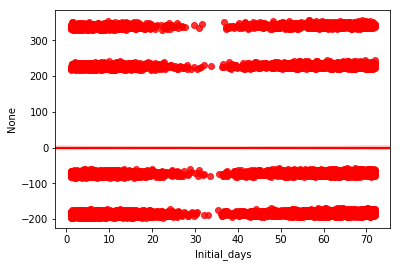

In [129]:
df = pd.read_csv('med_prepared.csv')
df['intercept'] = 1
residuals = df['TotalCharge'] - Model_totalcharge.predict(df[['Initial_days', 'DummyEmergencyAdmission',
       'DummyArthritisYes', 'DummyDiabetesYes', 'DummyHyperlipidemiaYes',
       'DummyBackPainYes', 'DummyAnxietyYes', 'DummyAllergic_rhinitisYes',
       'DummyRefluxYes','intercept']])
sns.regplot(x=df['Initial_days'],y=residuals,color='red')

In [130]:
#calculating the rmse 
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df['DummyEmergencyAdmission'], residuals, squared = False))
print(rmse)

14.259846240974694


In [131]:
# equation of the regression line
print('Adj. R-squared: {}'.format(Model_totalcharge.summary2().tables[0][3][0]))
equation = Model_totalcharge.summary2().tables[1]
print('Estimate [{}] as y = '.format(Model_totalcharge.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.991
Estimate [TotalCharge] as y = 
   +81.89 x ( Initial_days ) 
   +513.29 x ( DummyEmergencyAdmission ) 
   +64.23 x ( DummyArthritisYes ) 
   +72.60 x ( DummyDiabetesYes ) 
   +90.20 x ( DummyHyperlipidemiaYes ) 
   +82.66 x ( DummyBackPainYes ) 
   +85.93 x ( DummyAnxietyYes ) 
   +64.86 x ( DummyAllergic_rhinitisYes ) 
   +62.14 x ( DummyRefluxYes ) 
   +2044.92 x ( intercept ) 
